In [47]:
from keras.datasets import imdb
from keras.utils import to_categorical
from keras import models, layers, optimizers, losses, metrics
import numpy as np

MAX_WORD_NUM = 10000

num_to_word = {value:key for (key,value) in imdb.get_word_index().items()}

def decode_review(encoded_review):
  arr = [num_to_word.get(num-3, 'UNKNOWN') for num in encoded_review]
  return ' '.join(arr)


def vectorize_sequences(sequences):
  result = np.zeros((len(sequences), MAX_WORD_NUM))
  for i, sequence in enumerate(sequences):
    result[i,sequence] = 1
  return result


def build_model(input_shape, activation_name='relu', shape=(16,16), dropout=False, dropout_rate=0.5, weight_regularization=False, reg='l1'):
  network = models.Sequential()

  if weight_regularization:
    from keras import regularizers
    regularizer = regularizers.l1() if reg=='l1' else regularizers.l2()
  else:
    regularizer=None

  network.add(layers.Dense(shape[0], activation=activation_name, input_shape=input_shape))
  if dropout:
    network.add(layers.Dropout(dropout_rate))

  for layer_size in shape[1:]:
    network.add(layers.Dense(layer_size, activation=activation_name, kernel_regularizer=regularizer))
    if dropout:
      network.add(layers.Dropout(dropout_rate))

  network.add(layers.Dense(1, activation='sigmoid'))

  network.compile(optimizer=optimizers.RMSprop(), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

  return network

In [26]:
# to_categorical(test_labels[:10])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [3]:
(train_samples, train_labels),(test_samples, test_labels) = imdb.load_data(num_words=MAX_WORD_NUM)

train_samples = vectorize_sequences(train_samples)
test_samples = vectorize_sequences(test_samples)

train_labels = np.asarray(train_labels, dtype='float32')
test_labels = np.asarray(test_labels, dtype='float32')

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
EXCHANGE_PART = 15000
VALIDATION_PART=7500
train_samples = np.concatenate((train_samples, test_samples[:EXCHANGE_PART]))
test_samples = test_samples[EXCHANGE_PART:]

train_labels = np.concatenate((train_labels, test_labels[:EXCHANGE_PART]))
train_samples[0]
train_samples[0]
train_samples[0]
test_labels = test_labels[EXCHANGE_PART:]

# validation_data = train_data[:VALIDATION_PART]
# validation_labels = train_labels[:VALIDATION_PART]

## Start building the network

In [22]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics

network = models.Sequential()
network.add(layers.Dense(16, activation='sigmoid', input_shape=(MAX_WORD_NUM,)))
network.add(layers.Dense(16, activation='sigmoid'))
# network.add(layers.Dense(64, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.mse, metrics=[metrics.binary_accuracy])

history = network.fit(train_samples,train_labels, batch_size=512, epochs=10, validation_split=0.1)

Epoch 1/10
71/71 [==============================] - 3s 32ms/step - loss: 0.2312 - binary_accuracy: 0.6977 - val_loss: 0.1789 - val_binary_accuracy: 0.8360
Epoch 2/10
71/71 [==============================] - 2s 29ms/step - loss: 0.1581 - binary_accuracy: 0.8690 - val_loss: 0.1233 - val_binary_accuracy: 0.8748
Epoch 3/10
71/71 [==============================] - 2s 29ms/step - loss: 0.1067 - binary_accuracy: 0.8936 - val_loss: 0.0950 - val_binary_accuracy: 0.8873
Epoch 4/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0795 - binary_accuracy: 0.9126 - val_loss: 0.0828 - val_binary_accuracy: 0.8885
Epoch 5/10
71/71 [==============================] - 3s 48ms/step - loss: 0.0644 - binary_accuracy: 0.9241 - val_loss: 0.0782 - val_binary_accuracy: 0.8920
Epoch 6/10
71/71 [==============================] - 5s 65ms/step - loss: 0.0555 - binary_accuracy: 0.9350 - val_loss: 0.0764 - val_binary_accuracy: 0.8967
Epoch 7/10
71/71 [==============================] - 3s 38ms/step - los

## Building different networks for comparisons

In [35]:
shapes = [ 
          (4,4), (4,4,4), (16,16),  (16,16,16), (32,32), (32,32,32)
          # (32,16,32), (64,64), (64,64,64), (64,16,64), (64,32,64), (128,128)
          ]
validation_histories = []


In [48]:
# processed_index=2
EPOCHS = 20
# for shape in shapes:
num=1
shape=shapes[num]
model = build_model(train_samples[0].shape, shape=shape, dropout=False, weight_regularization=True)
history = model.fit(train_samples, train_labels, batch_size=128, epochs=EPOCHS, validation_split=0.15, verbose=False)
validation_histories.append(history.history['val_loss'])

In [51]:
model.evaluate(test_samples, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4305 - binary_accuracy: 0.8764


[0.4304817020893097, 0.8763999938964844]

In [ ]:
validation_histories[0]

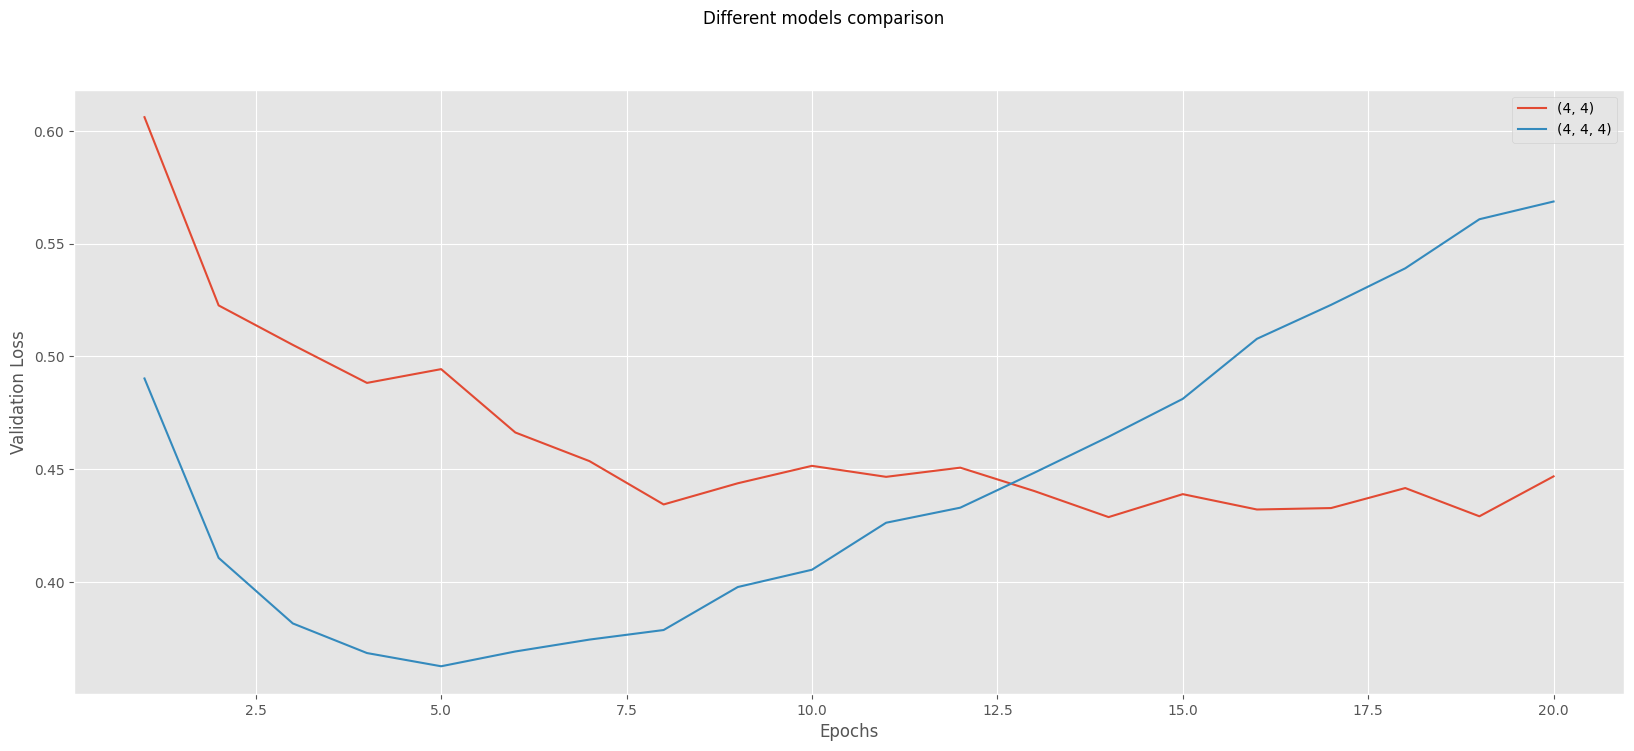

In [50]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(20,8), dpi=100).suptitle('Different models comparison')

epochs = range(1, EPOCHS+1)

fig_num = 0
for shape, val_hist in zip(shapes, validation_histories):
  # plt.subplot(3,4,fig_num)
  if fig_num > num:
    break
  fig_num+=1

  plt.plot(epochs, val_hist, label=str(shape))
  plt.xlabel('Epochs')
  plt.ylabel('Validation Loss')
  plt.legend(loc='upper right')

plt.show()
  

## Plotting the Accuracy curves of the built nets

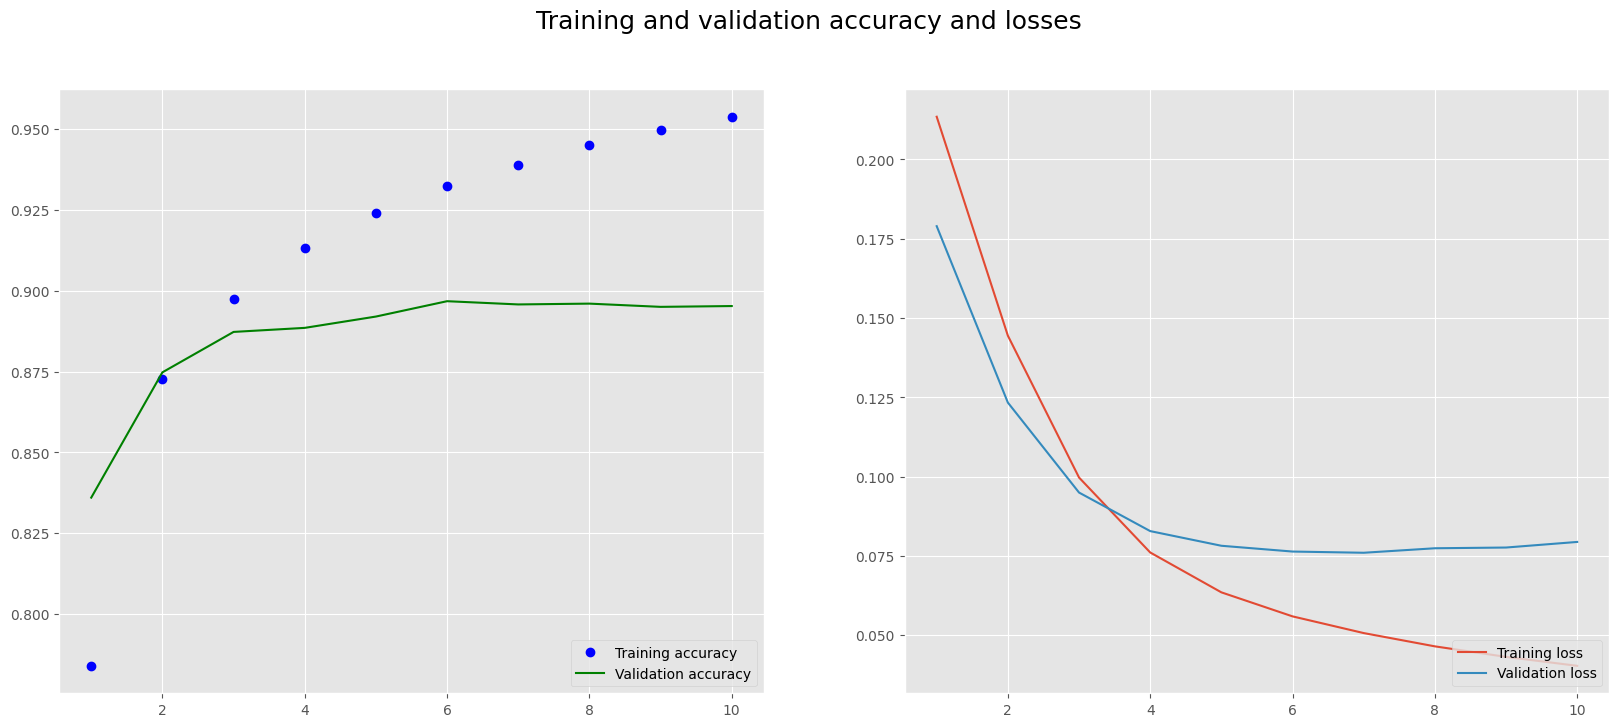

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
history_dict = history.history
training_acc = history_dict['binary_accuracy']
validation_acc = history_dict['val_binary_accuracy']

training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(training_acc)+1)

fig = plt.figure(figsize=(20,8), dpi=100)
fig.suptitle('Training and validation accuracy and losses', fontsize=18)

plt.subplot(1,2,1)
plt.plot(epochs, training_acc, 'bo',label='Training accuracy')
plt.plot(epochs, validation_acc, 'g', label='Validation accuracy')
# plt.title('Training and validation accuracies')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
# plt.title('Training and validation losses')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

In [24]:
# history.history
network.evaluate(test_samples, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - binary_accuracy: 0.8972


[0.07853824645280838, 0.8971999883651733]

SyntaxError: ignored